In [1]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Desktop/Taxi Fare Prediction\Dataset\TaxiFare.csv")
df=pd.DataFrame(dataset)
df


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  int32  
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  int32  
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int32(2), int64(1)
memory usage: 2.7 MB


In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df[df.duplicated()]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [25]:
df.corr()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,1.000000,-0.012349,-0.001434,0.005004,-0.006088,0.007732,-0.006911,-0.000947
amount,-0.012349,1.000000,0.125868,0.005944,-0.007338,0.004286,-0.005442,0.016583
date_time_of_pickup,-0.001434,0.125868,1.000000,-0.001135,-0.001375,0.000065,-0.002147,0.007934
longitude_of_pickup,0.005004,0.005944,-0.001135,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.006088,-0.007338,-0.001375,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.007732,0.004286,0.000065,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.006911,-0.005442,-0.002147,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,-0.000947,0.016583,0.007934,-0.005604,0.003237,-0.004936,0.002958,1.000000


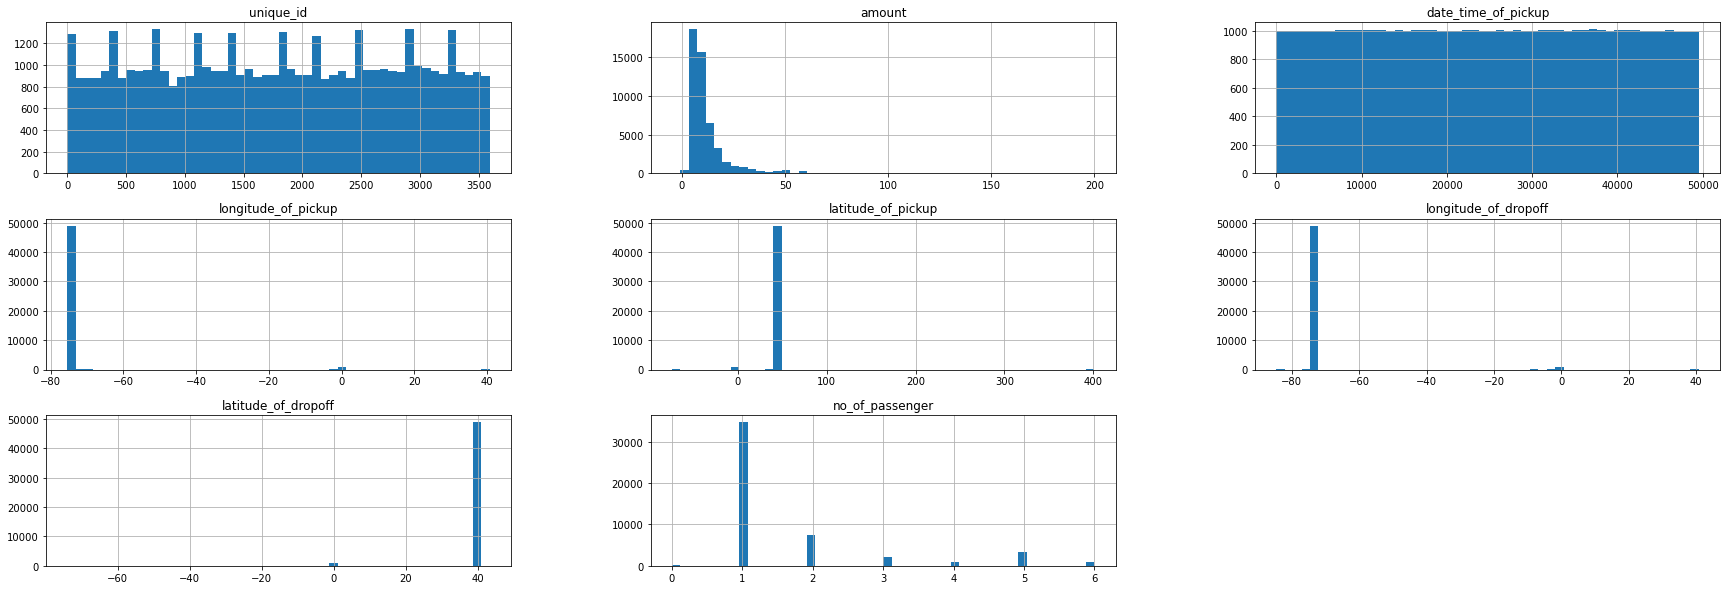

In [34]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,10))
plt.show()

In [28]:
corr=df.corr()

<AxesSubplot:>

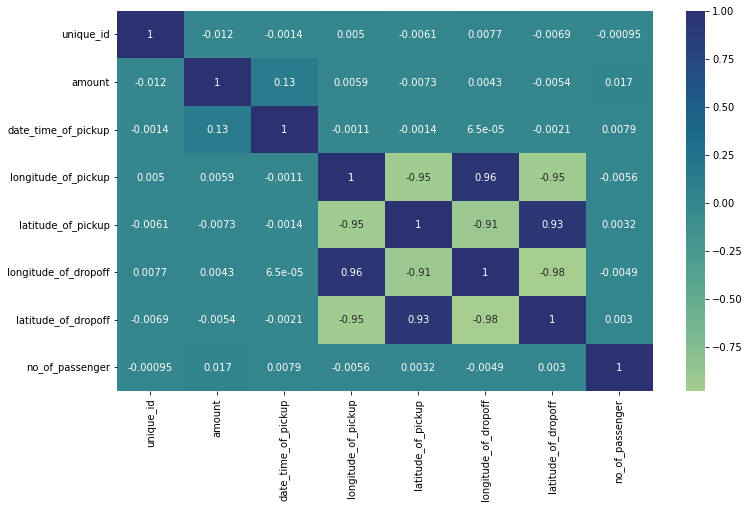

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

sns.heatmap(corr,annot=True,cmap='crest')

In [8]:
x=df.drop(["no_of_passenger"],axis=1)
y=df.iloc[:,7]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=90,criterion='entropy',random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=0)

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[   0,   34,    0,    0,    0,    0,    0],
       [   0, 7004,   13,    0,    0,    1,    0],
       [   0, 1429,    4,    0,    0,    1,    0],
       [   0,  410,    1,    0,    0,    0,    0],
       [   0,  206,    0,    0,    0,    0,    0],
       [   0,  686,    1,    0,    0,    1,    0],
       [   0,  209,    0,    0,    0,    0,    0]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7009

In [17]:
import warnings
warnings.simplefilter("ignore")

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.70      1.00      0.82      7018
           2       0.21      0.00      0.01      1434
           3       0.00      0.00      0.00       411
           4       0.00      0.00      0.00       206
           5       0.33      0.00      0.00       688
           6       0.00      0.00      0.00       209

    accuracy                           0.70     10000
   macro avg       0.18      0.14      0.12     10000
weighted avg       0.55      0.70      0.58     10000



In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
y_proba=model.predict_proba(x_test)

In [21]:
y_predicted=y_proba[:,1]

In [22]:
print(y_predicted)

[0.74444444 0.68888889 0.61111111 ... 0.71111111 0.77777778 0.54444444]
